# Assignment 6

In [1]:
# code from M06-A01

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

In [2]:
# given code
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', \
                                   'Petal Length', 'Petal Width', 
                                   'Species'], header=None)
iris = iris.dropna()

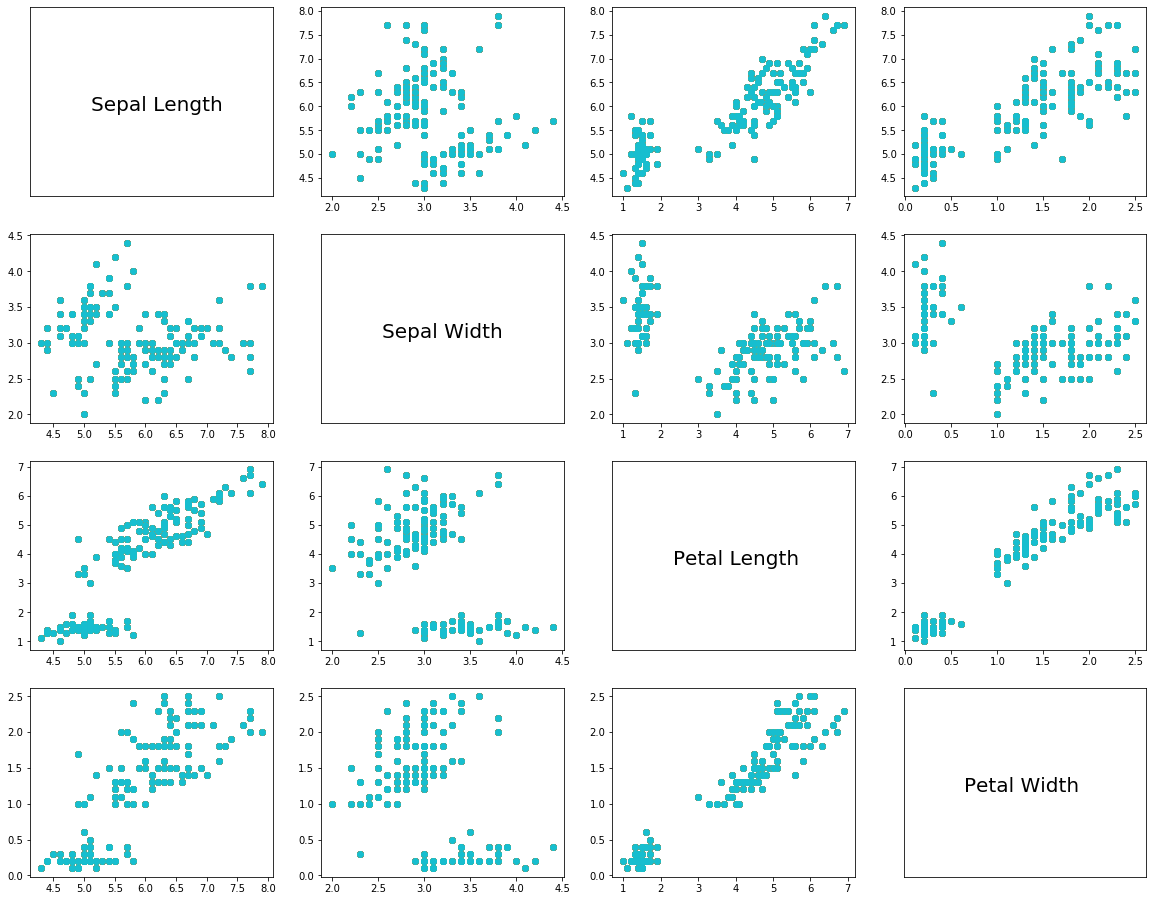

In [3]:
# A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.
pairs(iris)

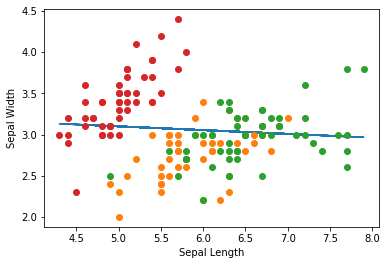

Coefficients: [-0.04563051]
Mean squared error: 0.15
Variance score: 0.02


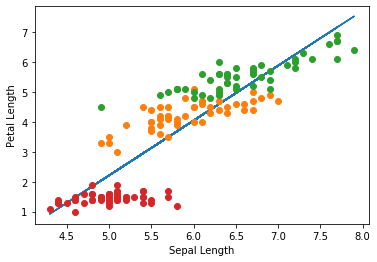

Coefficients: [1.83620703]
Mean squared error: 0.60
Variance score: 0.83


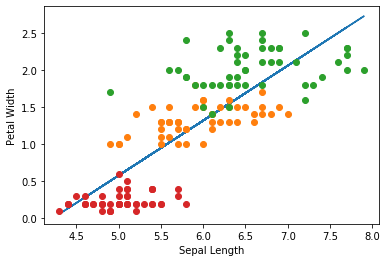

Coefficients: [0.73938278]
Mean squared error: 0.15
Variance score: 0.77


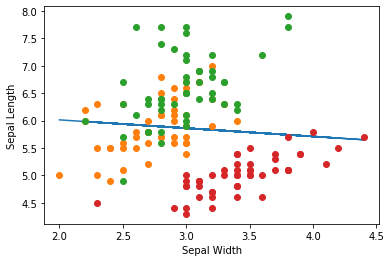

Coefficients: [-0.15105352]
Mean squared error: 0.76
Variance score: 0.02


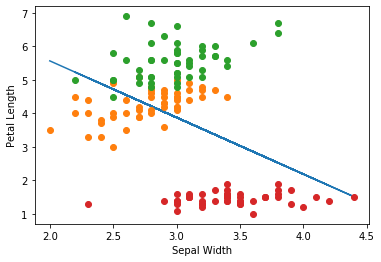

Coefficients: [-1.6907069]
Mean squared error: 2.92
Variance score: 0.15


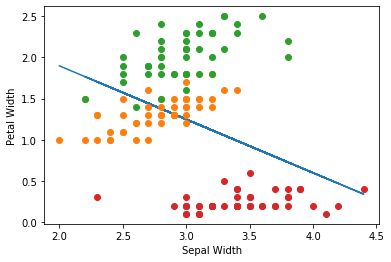

Coefficients: [-0.64918385]
Mean squared error: 0.58
Variance score: 0.07


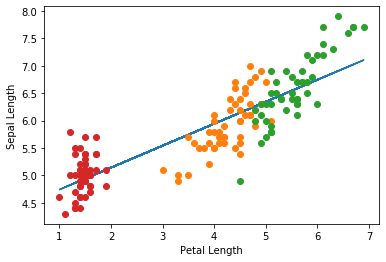

Coefficients: [0.39996256]
Mean squared error: 0.14
Variance score: 0.82


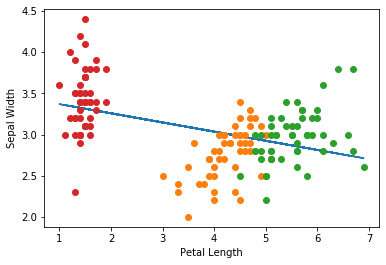

Coefficients: [-0.11124757]
Mean squared error: 0.14
Variance score: 0.13


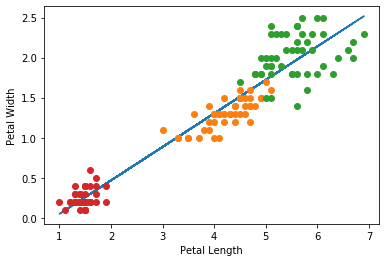

Coefficients: [0.41849633]
Mean squared error: 0.05
Variance score: 0.92


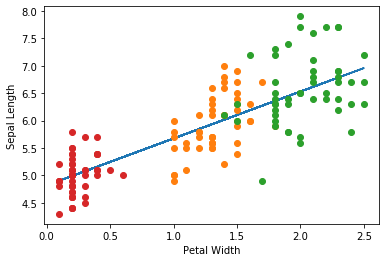

Coefficients: [0.85384162]
Mean squared error: 0.19
Variance score: 0.76


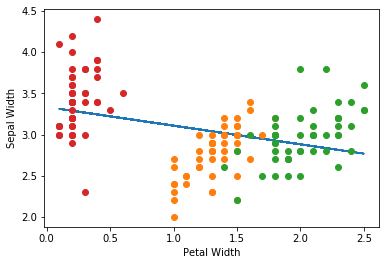

Coefficients: [-0.22646453]
Mean squared error: 0.15
Variance score: 0.04


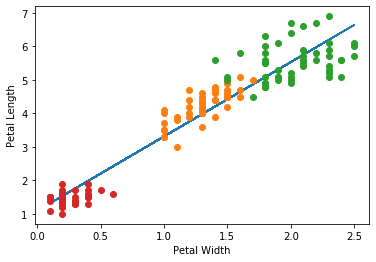

Coefficients: [2.21871721]
Mean squared error: 0.26
Variance score: 0.92


In [4]:
# A plot of the linear regression models generated on each pairwise combination of features, 
# with corresponding model statistics.
import sklearn.linear_model as model # for Linear Regression model
import sklearn.model_selection as functions # for Cross Validation functions
import numpy as np

# split the data into train and test sets
train_set, test_set = functions.train_test_split(iris)

def plot_linear_regression(iris, f1, f2):
    # initiate model
    regr = model.LinearRegression()
    f1 = f1[0]
    f2 = f2[0]
    
    # set the colx/coly train and tests
    colx_train = train_set.iloc[:, f1]
    coly_train = train_set.iloc[:, f2]
    colx_test = test_set.iloc[:, f1]
    coly_test = test_set.iloc[:, f2]
    
    # reshape the train and test
    colx_train = colx_train.values.reshape(-1, 1)
    colx_test = colx_test.values.reshape(-1, 1)
    
    # fit the model
    regr = regr.fit(colx_train, coly_train)
    
    # plot the data
    pl.plot(colx_train, regr.predict(colx_train))
    
    # create the graph
    for name in set(iris['Species']):
        cond = iris['Species'] == name
        pl.plot(iris.iloc[:, f1][cond], iris.iloc[:, f2][cond], linestyle='none', marker='o', label=name)

    # label the graphs
    label = iris.columns[f1]
   
    pl.xlabel(label)
    pl.ylabel(iris.columns[f2])

    pl.show()
    
    
    # The coefficient(s).
    print("Coefficients:", regr.coef_)

    # The mean squared error
    print("Mean squared error: %.2f" % np.mean(((regr.predict(colx_test) - coly_test) ** 2)))

    # Explained variance score: 1 is perfect prediction
    print("Variance score: %.2f" % regr.score(colx_test, coly_test))
    
# loop through and make all graph combinations
for i in range(4):
    for j in range(4):
        if i != j:
            plot_linear_regression(iris, (i,), (j,))

(1, 0)
(2, 0)
(3, 0)
(0, 1)
(3, 1)
(2, 1)
(2, 3)


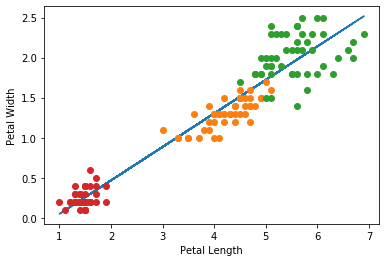

Coefficients: [0.41849633]
Mean squared error: 0.05
Variance score: 0.92


In [7]:
# A plot of the best overall linear regression model you were able to generate using any combination of features 
# (including the use of multiple features used in combination to predict a single feature), 
# with corresponding model statistics.
def best_model(iris, f1, f2):
    # the next 12 lines of code copied from above function
    train_set, test_set = functions.train_test_split(iris)
    regr = model.LinearRegression()
    f1 = f1[0]
    f2 = f2[0]
    
    colx_train = train_set.iloc[:, f1]
    coly_train = train_set.iloc[:, f2]
    colx_test = test_set.iloc[:, f1]
    coly_test = test_set.iloc[:, f2]
    
    colx_train = colx_train.values.reshape(-1, 1)
    colx_test = colx_test.values.reshape(-1, 1)
    
    regr = regr.fit(colx_train, coly_train)

    # mean squared error - copied from above
    mean_square = np.mean(((regr.predict(colx_test) -coly_test) ** 2))

    return (mean_square, (f1, f2))

import itertools as iter
def combos(lst):
    combo = (iter.combinations(lst, l) for l in range(len(lst) + 1))
    return list(iter.chain.from_iterable(combo))

best_mean = float("inf") # need a way to start initial comparison and a variable to store later
best_f = None # variable for best feature
# for loop 4 times (because 4 features)
for i in range(4):
    x = []
    for j in range(4):
        if i != j:
            x.append(j)
    for s in combos(x):
        if s:
            (mean_square, (f1, f2)) = best_model(iris, s, (i, ))
            if mean_square < best_mean:
                best_mean = mean_square
                best_f = (f1, f2)
                print(best_f)

plot_linear_regression(iris, best_f[0:], best_f[1:])

# Questions
1. Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.
2. Suppose you tried to generate a classification model on this dataset, but only after remov- ing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

# Answers
1. Based on the above linear models, the pair of features that appear to be the most predictive for one another are Petal Length and Petal Width. This is because they are the ones with the best variance score as well as the most clustered. It's also the best model above.
2. Removing the feature that I was best able to predict based upon other features would not affect the classification performance because this information can be found by manipulating the other features.